## Getting Ready

**Before we start downloading the data set, we need the Kaggle API token. To get that**

    1) Login into your Kaggle account

    2) Get into your account settings page

    3) Click on Create a new API token
    
    4) This will prompt you to download the .json file into your system. Save the file, and we will use it in the next step.

## Data Pre-processing

In [1]:

# Config display
import sys
import warnings
import numpy as np
import pandas as pd
from skimpy import skim
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.discovery import all_displays
# from tune_sklearn import TuneGridSearchCV
# from sklearn.tree import export_graphviz

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)

# Config sys path
if ('../' not in sys.path):
    sys.path.append('../')
    
# Import library
from fraud import *
from sklearn.model_selection import train_test_split

# Set seed
seed = 2024

In [2]:
# Download and load dataset 
download_path = "../data/raw"
df = download_and_load(download_path)
df.head(5)

Skipping, found downloaded files in "../data/raw\dataset-phishing-domain-detection-cybersecurity" (use force=True to force download)


qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  qty_percent_url  qty_tld_url  length_url  qty_dot_domain  qty_hyphen_domain  qty_underline_domain  qty_slash_domain  qty_questionmark_domain  qty_equal_domain  qty_at_domain  qty_and_domain  qty_exclamation_domain  qty_space_domain  \
0            1               0                  0              1                     0              0           0            0                    0              0              0              0             0                 0                0               0                0            1          13               1                  0                     0                 0                        0                 0              0               0                       0                 0   
1            2               5                  4              2                     0              0           0            0                    0              0              0              0             0                 0                0               0                0            1         329               2                  0                     0                 0                        0                 0              0               0                       0                 0   
2            2               0                  0              0                     0              0           0            0                    0              0              0              0             0                 0                0               0                0            1          24               2                  0                     0                 0                        0                 0              0               0                       0                 0   
3            1               1                  0              2                     0              0           0            0                    0              0              0              0             0                 0                0               0                0            1          23               1                  1                     0                 0                        0                 0              0               0                       0                 0   
4            2               1                  0              0                     0              0           0            0                    0              0              0              0             0                 0                0               0                0            1          23               2                  1                     0                 0                        0                 0              0               0                       0                 0   

   qty_tilde_domain  qty_comma_domain  qty_plus_domain  qty_asterisk_domain  qty_hashtag_domain  qty_dollar_domain  qty_percent_domain  qty_vowels_domain  domain_length  domain_in_ip  server_client_domain  qty_dot_directory  qty_hyphen_directory  qty_underline_directory  qty_slash_directory  qty_questionmark_directory  qty_equal_directory  qty_at_directory  qty_and_directory  qty_exclamation_directory  qty_space_directory  qty_tilde_directory  qty_comma_directory  qty_plus_directory  \
0                 0                 0                0                    0                   0                  0                   0                  1              7             0                     0                  0                     0                        0                    1                           0                    0                 0                  0                          0                    0                    0                    0                   0   
1                 0                 0                0  

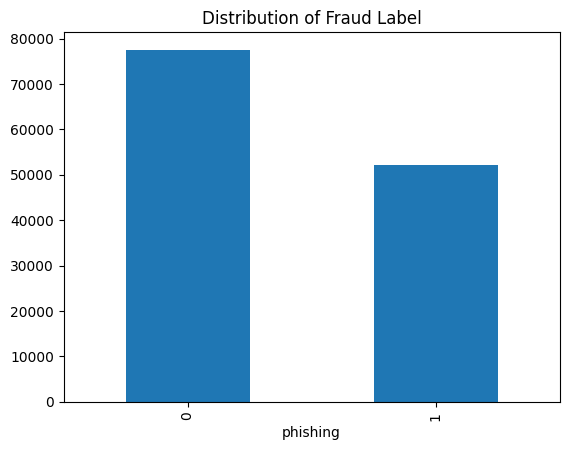

In [3]:
# Data Preprocessing and visualize data before training
upload_path = "../data/processed"
df = upload(preprocess(df), upload_path)
pre_plot(df)

In [4]:
# Overview of data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Data columns (total 99 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   qty_dot_url                 129698 non-null  float64
 1   qty_hyphen_url              129698 non-null  float64
 2   qty_underline_url           129698 non-null  float64
 3   qty_slash_url               129698 non-null  float64
 4   qty_questionmark_url        129698 non-null  float64
 5   qty_equal_url               129698 non-null  float64
 6   qty_at_url                  129698 non-null  float64
 7   qty_and_url                 129698 non-null  float64
 8   qty_exclamation_url         129698 non-null  float64
 9   qty_space_url               129698 non-null  float64
 10  qty_tilde_url               129698 non-null  float64
 11  qty_comma_url               129698 non-null  float64
 12  qty_plus_url                129698 non-null  float64
 13  qty_asterisk_u

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  qty_percent_url  qty_tld_url  length_url  qty_dot_domain  qty_hyphen_domain  qty_underline_domain  qty_at_domain  qty_vowels_domain  domain_length  domain_in_ip  server_client_domain  qty_dot_directory  qty_hyphen_directory  \
count    129698.00       129698.00          129698.00      129698.00             129698.00      129698.00   129698.00    129698.00            129698.00      129698.00      129698.00      129698.00     129698.00         129698.00        129698.00       129698.00        129698.00    129698.00   129698.00       129698.00          129698.00             129698.00      129698.00          129698.00      129698.00     129698.00             129698.00          129698.00             129698.00   
mean          0.05            0.01               0.01           0.03                  0.00           0.01        0.00         0.01                 0.00           0.00           0.00           0.00          0.00              0.00             0.00            0.00             0.00         0.09        0.01            0.09               0.01                  0.00           0.00               0.09           0.06          0.00                  0.00               0.04                  0.03   
std           0.06            0.03               0.03           0.04                  0.01           0.04        0.01         0.04                 0.01           0.01           0.02           0.01          0.01              0.01             0.01            0.01             0.01         0.02        0.01            0.04               0.04                  0.01           0.00               0.04           0.03          0.05                  0.06               0.05                  0.05   
min           0.00            0.00               0.00           0.00                  0.00           0.00        0.00         0.00                 0.00           0.00           0.00           0.00          0.00              0.00             0.00            0.00             0.00         0.00        0.00            0.00               0.00                  0.00           0.00               0.00           0.00          0.00                  0.00               0.00                  0.00   
25%           0.04            0.00               0.00           0.00                  0.00           0.00        0.00         0.00                 0.00           0.00           0.00           0.00          0.00              0.00             0.00            0.00             0.00         0.08        0.00            0.05               0.00                  0.00           0.00               0.07           0.04          0.00                  0.00               0.00                  0.00   
50%           0.04            0.00               0.00           0.02                  0.00           0.00        0.00         0.00                 0.00           0.00           0.00           0.00          0.00              0.00             0.00            0.00             0.00         0.08        0.00            0.10               0.00                  0.00           0.00               0.08           0.06          0.00                  0.00               0.05                  0.04   
75%           0.04            0.00               0.00           0.07                  0.00           0.00        0.00         0.00                 0.00           0.00           0.00           0.00          0.00              0.00             0.00            0.00             0.00         0.08        0.01            0.10               0.00                  0.00           0.00               0.11           0.08          0.00                  0.00               0.05                  0.04   
max           1.00            1.00               1.00           1.00                  1

In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 129698 │ │ float64     │ 98    │                                                          │
│ │ Number of columns │ 99     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean     ┃ sd     ┃ p0 ┃ p25     ┃ p50     ┃ p75    ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ qty_dot_url            │   0 │     0 │    0.053 │  0.057 │  0 │   0.043 │   0.043 │  0.043 │    1 │   ▇    │  │
│ │ qty_hyphen_url         │   0 │     0 │    0.011 │  0.034 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_underline_url      │   0 │     0 │   0.0063 │  0.034 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_slash_url          │   0 │     0 │    0.034 │  0.045 │  0 │       0 │   0.023 │  0.068 │    1 │   ▇    │  │
│ │ qty_questionmark_url   │   0 │     0 │   0.0012 │  0.014 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_equal_url          │   0 │     0 │     0.01 │  0.045 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_at_url             │   0 │     0 │   0.0006 │ 0.0068 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_and_url            │   0 │     0 │   0.0063 │  0.038 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_exclamation_url    │   0 │     0 │  0.00035 │ 0.0098 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_space_url          │   0 │     0 │  0.00014 │  0.009 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_tilde_url          │   0 │     0 │  0.00074 │  0.017 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_comma_url          │   0 │     0 │  0.00023 │  0.007 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_plus_url           │   0 │     0 │  0.00018 │ 0.0066 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_asterisk_url       │   0 │     0 │    9e-05 │ 0.0056 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_hashtag_url        │   0 │     0 │  4.7e-05 │ 0.0052 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_dollar_url         │   0 │     0 │  0.00021 │   0.01 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_percent_url        │   0 │     0 │  0.00072 │  0.011 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_tld_url            │   0 │     0 │    0.088 │  0.023 │  0 │   0.083 │   0.083 │  0.083 │    1 │   ▇    │  │
│ │ length_url             │   0 │     0 │   0.0084 │  0.012 │  0 │  0.0031 │  0.0046 │ 0.0094 │    1 │   ▇    │  │
│ │ qty_dot_domain         │   0 │     0 │    0.088 │  0.035 │  0 │   0.048 │   0.095 │  0.095 │    1 │   ▇    │  │
│ │ qty_hyphen_domain      │   0 │     0 │    0.011 │   0.04 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_underline_domain   │   0 │     0 │  0.00021 │ 0.0098 │  0 │       0 │       0 │      0 │    1 │   ▇    │  │
│ │ qty_at_domain          │   0 │     0 │  7.7e-06 │ 0.

## Lazy Prediction

Lazy prediction runs multiple classification models.

In [6]:
# Lazy prediction
lazy_predict(df, exclude=None)

  5%|▍         | 1/22 [00:13<04:46, 13.66s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9265227447956823, 'Balanced Accuracy': 0.9231239206302253, 'ROC AUC': 0.9231239206302253, 'F1 Score': 0.9264877067301567, 'Time taken': 13.657436609268188}


  9%|▉         | 2/22 [00:28<04:45, 14.28s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9841557440246723, 'Balanced Accuracy': 0.9831084593438619, 'ROC AUC': 0.9831084593438619, 'F1 Score': 0.9841490798972385, 'Time taken': 14.709251165390015}


 14%|█▎        | 3/22 [00:29<02:33,  8.08s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.8402852737085582, 'Balanced Accuracy': 0.8623674673478425, 'ROC AUC': 0.8623674673478425, 'F1 Score': 0.8415394061669077, 'Time taken': 0.6971814632415771}


 18%|█▊        | 4/22 [00:31<01:45,  5.86s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9798766383962991, 'Balanced Accuracy': 0.9789648829373655, 'ROC AUC': 0.9789648829373655, 'F1 Score': 0.9798744210026621, 'Time taken': 2.4577369689941406}


 23%|██▎       | 5/22 [00:32<01:06,  3.93s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.5978797224363916, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.44741810973803947, 'Time taken': 0.5221428871154785}


 27%|██▋       | 6/22 [00:32<00:45,  2.84s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9761372397841171, 'Balanced Accuracy': 0.9757591929931007, 'ROC AUC': 0.9757591929931005, 'F1 Score': 0.9761506978970071, 'Time taken': 0.7156820297241211}


 32%|███▏      | 7/22 [00:52<02:04,  8.32s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9874710871241326, 'Balanced Accuracy': 0.9870895347402322, 'ROC AUC': 0.9870895347402323, 'F1 Score': 0.9874725572034386, 'Time taken': 19.600505113601685}


 36%|███▋      | 8/22 [00:53<01:23,  5.94s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.7288743253662298, 'Balanced Accuracy': 0.6700366595133089, 'ROC AUC': 0.6700366595133088, 'F1 Score': 0.6949262531145344, 'Time taken': 0.8321731090545654}


 41%|████      | 9/22 [01:05<01:44,  8.06s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9579799537393986, 'Balanced Accuracy': 0.9563839772180489, 'ROC AUC': 0.9563839772180488, 'F1 Score': 0.957983244189513, 'Time taken': 12.716280221939087}


 45%|████▌     | 10/22 [01:09<01:21,  6.78s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9033924441017733, 'Balanced Accuracy': 0.911203905780408, 'ROC AUC': 0.911203905780408, 'F1 Score': 0.9041737744796897, 'Time taken': 3.9336040019989014}


 50%|█████     | 11/22 [01:13<01:02,  5.69s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.9223592906707787, 'Balanced Accuracy': 0.9210702888867217, 'ROC AUC': 0.9210702888867217, 'F1 Score': 0.9224926061877424, 'Time taken': 3.212265968322754}


 55%|█████▍    | 12/22 [01:13<00:41,  4.15s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.8402852737085582, 'Balanced Accuracy': 0.8623674673478425, 'ROC AUC': 0.8623674673478425, 'F1 Score': 0.8415394061669077, 'Time taken': 0.6152017116546631}


 59%|█████▉    | 13/22 [01:14<00:28,  3.17s/it]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.905242868157286, 'Balanced Accuracy': 0.9064892098890394, 'ROC AUC': 0.9064892098890394, 'F1 Score': 0.9056549098317407, 'Time taken': 0.9101042747497559}


 64%|██████▎   | 14/22 [01:15<00:19,  2.50s/it]

{'Model': 'Perceptron', 'Accuracy': 0.8913646877409407, 'Balanced Accuracy': 0.8814169949618537, 'ROC AUC': 0.8814169949618537, 'F1 Score': 0.8906597530503608, 'Time taken': 0.9551830291748047}


 68%|██████▊   | 15/22 [01:17<00:17,  2.44s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.7071318427139552, 'Balanced Accuracy': 0.6371948211898251, 'ROC AUC': 0.6371948211898252, 'F1 Score': 0.6544982209718777, 'Time taken': 2.311706066131592}


 73%|███████▎  | 16/22 [01:35<00:42,  7.02s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9883191981495759, 'Balanced Accuracy': 0.9878458844215374, 'ROC AUC': 0.9878458844215375, 'F1 Score': 0.9883191064667579, 'Time taken': 17.63288640975952}


 77%|███████▋  | 17/22 [01:36<00:25,  5.12s/it]

{'Model': 'RidgeClassifier', 'Accuracy': 0.9037008481110255, 'Balanced Accuracy': 0.9114304311438587, 'ROC AUC': 0.9114304311438587, 'F1 Score': 0.9044760771502401, 'Time taken': 0.7081930637359619}


 82%|████████▏ | 18/22 [01:39<00:18,  4.66s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.9035851966075559, 'Balanced Accuracy': 0.9113337131091692, 'ROC AUC': 0.9113337131091691, 'F1 Score': 0.9043622635179099, 'Time taken': 3.586076498031616}


 86%|████████▋ | 19/22 [01:41<00:11,  3.77s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.9158057054741712, 'Balanced Accuracy': 0.9185558981499784, 'ROC AUC': 0.9185558981499785, 'F1 Score': 0.9162361247094858, 'Time taken': 1.6824815273284912}
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 95%|█████████▌| 21/22 [01:43<00:02,  2.54s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9710871241326138, 'Balanced Accuracy': 0.9697152538598217, 'ROC AUC': 0.9697152538598217, 'F1 Score': 0.9710807333827347, 'Time taken': 2.217820405960083}
[LightGBM] [Info] Number of positive: 41721, number of negative: 62037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3191
[LightGBM] [Info] Number of data points in the train set: 103758, number of used features: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402099 -> initscore=-0.396726
[LightGBM] [Info] Start training from score -0.396726


100%|██████████| 22/22 [01:46<00:00,  4.83s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9633770239013107, 'Balanced Accuracy': 0.962058893145249, 'ROC AUC': 0.962058893145249, 'F1 Score': 0.9633821771899386, 'Time taken': 2.637096643447876}


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  Time Taken
Model                                                                                    
RandomForestClassifier             0.99               0.99     0.99      0.99       17.63
ExtraTreesClassifier               0.99               0.99     0.99      0.99       19.60
BaggingClassifier                  0.98               0.98     0.98      0.98       14.71
DecisionTreeClassifier             0.98               0.98     0.98      0.98        2.46
ExtraTreeClassifier                0.98               0.98     0.98      0.98        0.72
XGBClassifier                      0.97               0.97     0.97      0.97        2.22
LGBMClassifier                     0.96               0.96     0.96      0.96        2.64
KNeighborsClassifier               0.96               0.96     0.96      0.96       12.72
AdaBoostClassifier                 0.93               0.92     0.92      0.93       13.66
LogisticRegression                 0.92               0.92     0.92      0.92        3.21
SGDClassifier                      0.92               0.92     0.92      0.92        1.68
RidgeClassifier                    0.90               0.91     0.91      0.90        0.71
RidgeClassifierCV                  0.90               0.91     0.91      0.90        3.59
LinearDiscriminantAnalysis         0.90               0.91     0.91      0.90        3.93
PassiveAggressiveClassifier        0.91               0.91     0.91      0.91        0.91
Perceptron                         0.89               0.88     0.88      0.89        0.96
NearestCentroid                    0.84               0.86     0.86      0.84        0.62
BernoulliNB                        0.84               0.86     0.86      0.84        0.70
GaussianNB                         0.73               0.67     0.67      0.69        0.83
QuadraticDiscriminantAnalysis      0.71               0.64     0.64      0.65        2.31
DummyClassifier                    0.60               0.50     0.50      0.45        0.52

Through lazy prediction, the best performing models are **RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, DecisionTreeClassifier**

## Best Model Fitting

In [7]:
# Train test split
X = df.drop("phishing", axis=1)
y = df["phishing"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=df["phishing"])
feat_cols = np.array(X_train.columns)

In [8]:
# Default model training
clf = train(RandomForestClassifier(random_state=seed), X_train, y_train, None, "../models/model.pkl")
y_pred = predict(clf, X_test, y_test)

Accuracy: 0.9877023901310718
Recall: 0.9872495446265938


In [9]:
# Hyperparameters
print("max_depth: ", max((e.tree_.max_depth for e in clf.estimators_)))
print("min_depth: ", min((e.tree_.max_depth for e in clf.estimators_)))
print("max_depth: ", clf.get_params())

max_depth:  51
min_depth:  31
max_depth:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2024, 'verbose': 0, 'warm_start': False}


In [10]:
# Hyperparameter tuning
param_grid = {
    "n_estimators": [25, 50, 75, 100],
    "max_depth": [30, 40, 50],
    "min_samples_split": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

model, best_params = train(RandomForestClassifier(random_state=seed), X_train, y_train, param_grid, "../models/tuned_model.pkl")
y_pred = predict(model, X_test, y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 50}
Accuracy: 0.987201233616037
Recall: 0.9865784680279934


## Feature Importance

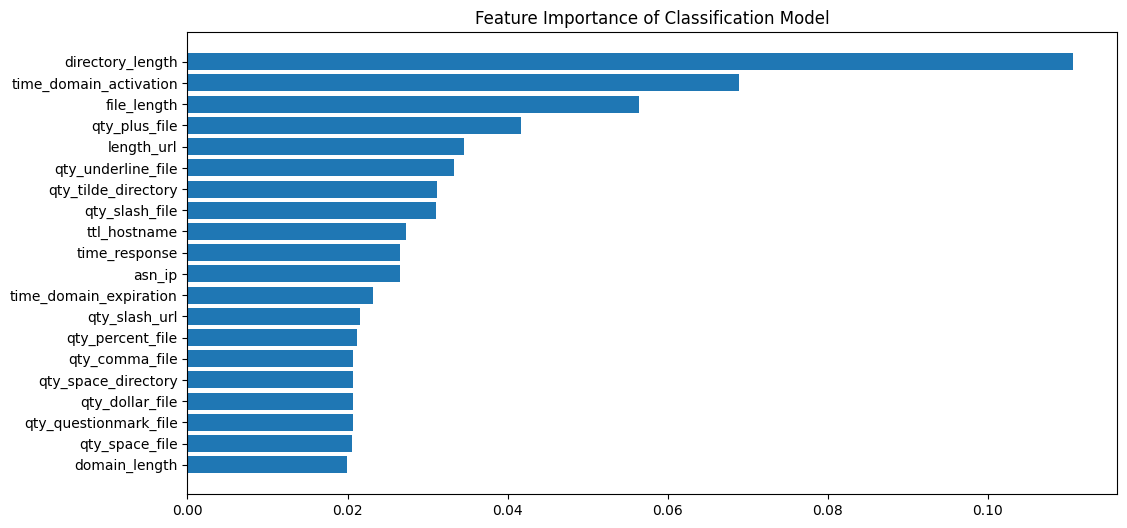

In [11]:
feat_importance(model, feat_cols)

In [12]:
shap_plot(df, "phishing", 100, model)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2024),
                   n_iter=50,
                   param_distributions={'max_depth': [30, 40, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [1, 2, 4],
                                        'n_estimators': [25, 50, 75, 100]},
                   verbose=1)

In [ ]:
lime_plot(X_train, X_test, y_test, 5, model)

Instance 1:
True Class: Phishing
Predicted Class: Phishing
Explanation for Predicted Class:


Instance 2:
True Class: Phishing
Predicted Class: Phishing
Explanation for Predicted Class:


Instance 3:
True Class: Not Phishing
Predicted Class: Not Phishing
Explanation for Predicted Class:


Instance 4:
True Class: Phishing
Predicted Class: Phishing
Explanation for Predicted Class:


Instance 5:
True Class: Not Phishing
Predicted Class: Not Phishing
Explanation for Predicted Class:


### Experiment: What would the performance be after performing feature selection?


[info]: k = 10, currently selecting top 10 features.
Accuracy: 0.9028141865844256
Recall: 0.8643466589972199


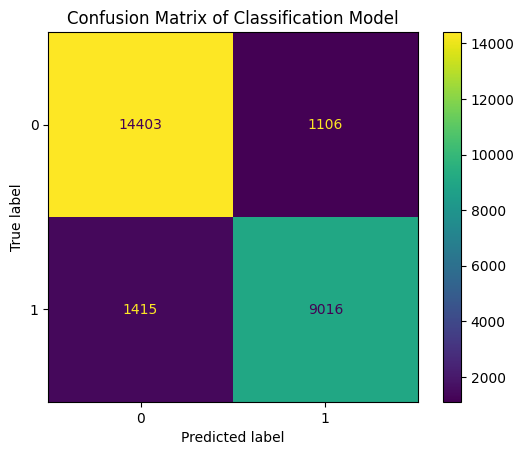

[info]: k = 20, currently selecting top 20 features.
Accuracy: 0.9029683885890517
Recall: 0.8644425270827342


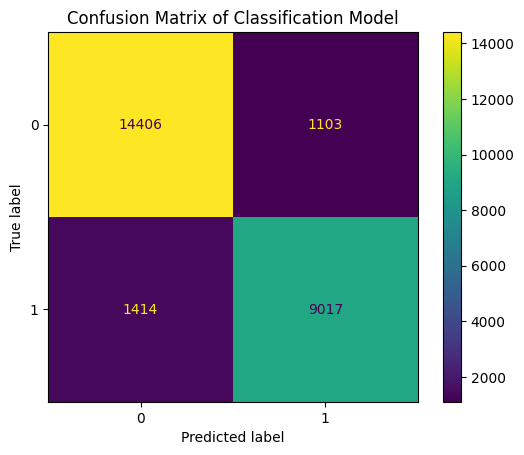

[info]: k = 30, currently selecting top 30 features.
Accuracy: 0.9001927525057826
Recall: 0.8635797143131052


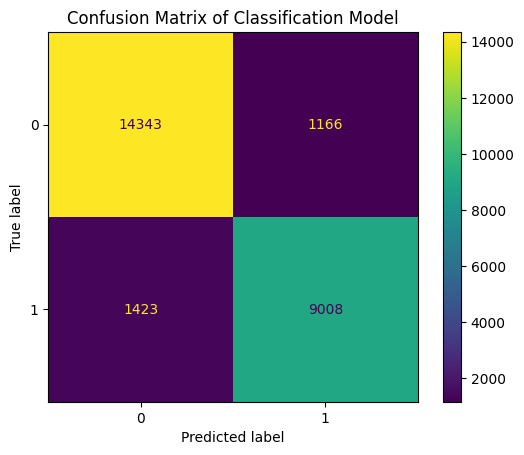

[info]: k = 40, currently selecting top 40 features.


In [ ]:
# Top K features selection based on mutual information 
plot_accuracy_vs_k(df, "phishing", range(10, 100, 10), seed) 

## Evaluation

In [ ]:
displays = all_displays()
displays

[('CalibrationDisplay', sklearn.calibration.CalibrationDisplay),
 ('ConfusionMatrixDisplay',
  sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay),
 ('DecisionBoundaryDisplay',
  sklearn.inspection._plot.decision_boundary.DecisionBoundaryDisplay),
 ('DetCurveDisplay', sklearn.metrics._plot.det_curve.DetCurveDisplay),
 ('LearningCurveDisplay', sklearn.model_selection._plot.LearningCurveDisplay),
 ('PartialDependenceDisplay',
  sklearn.inspection._plot.partial_dependence.PartialDependenceDisplay),
 ('PrecisionRecallDisplay',
  sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay),
 ('PredictionErrorDisplay',
  sklearn.metrics._plot.regression.PredictionErrorDisplay),
 ('RocCurveDisplay', sklearn.metrics._plot.roc_curve.RocCurveDisplay),
 ('ValidationCurveDisplay',
  sklearn.model_selection._plot.ValidationCurveDisplay)]

In [ ]:
# Export tree as dot file

# for i in range(len(model.best_estimator_)):
#     export_graphviz(model.best_estimator_[i], out_file=f"visualization/tree_{i}.dot", 
#                 feature_names=cleaned_data.drop("phishing", axis=1).columns,
#                 class_names=["phishing"],
#                 filled=True,
#                 rounded=True, proportion=False, 
#                 precision=2, filled=True)

#     # Convert to png using system command (requires Graphviz)
#     # os.system('dot -Tpng tree.dot -o tree.png')
#     call(["dot", "-Tpng", f"tree_{i}.dot", "-o", f"tree_{i}.png", "-Gdpi=300"])

#     # Display in jupyter notebook
#     Image(filename = f"tree_{i}.png")

# Alternatively
# for i in range(len(model.best_estimator_)):
#     fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
#     tree.plot_tree(model.best_estimator_[i],
#                 feature_names=list(cleaned_data.columns.drop("phishing")), 
#                 class_names=["phishing"],
#                 filled=True, 
#                 rounded=True, proportion=False, 
#                 precision=2)
    
#     fig.savefig(f"visualization/tree_{i}.png")

## Confusion Matrix

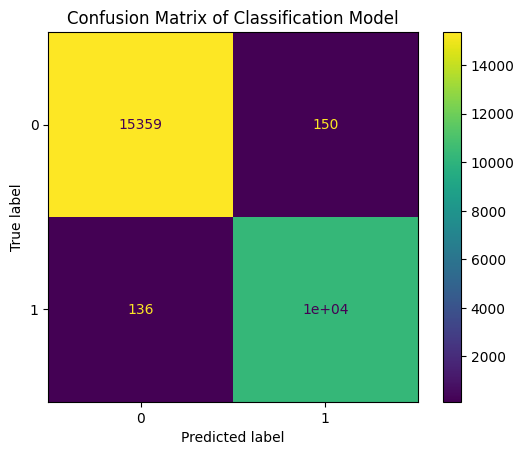

In [ ]:
confusion_plot(y_test, y_pred)

## Precision-Recall

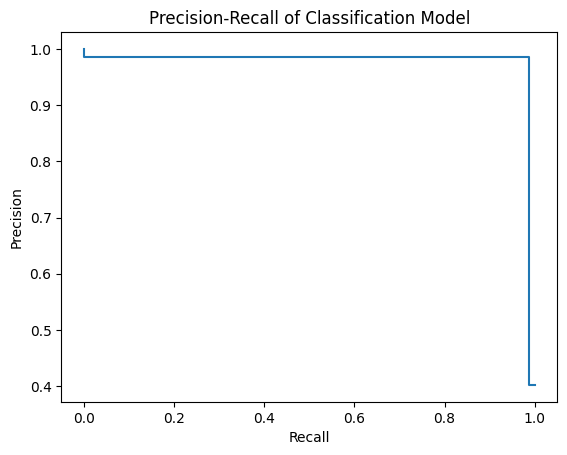

In [ ]:
precision_recall(y_test, y_pred)

## ROC Curve

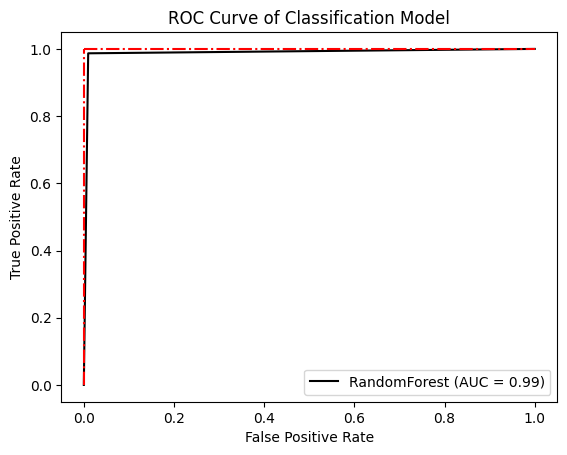

In [ ]:
roc_curve(y_test, y_pred)

## Calibration Display

A perfectly calibrated model would have a calibration curve closely aligned with the 45-degree diagonal line on the plot. This line represents ideal calibration, where the **predicted probabilities match the observed frequencies**. Deviations from this diagonal line indicate either overconfidence or underconfidence in the model's predictions.

- Overconfidence: If the curve lies above the diagonal line, the model is overconfident. This means there are more instances with predicted probabilities close to 1 than there should be, and the model's confidence in its predictions is higher than the actual success rate.
- Underconfidence: If the curve lies below the diagonal line, the model is underconfident. In this case, instances with high predicted probabilities are less frequent than they should be and the model's confidence is lower than the actual success rate.

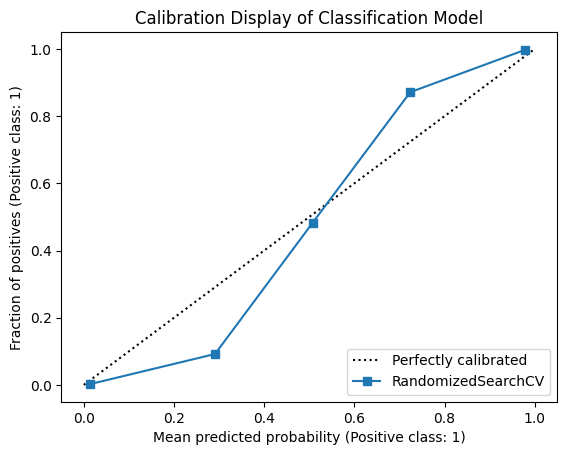

In [ ]:
calibration_disp(model, X_test, y_test)

## Decision Boundary

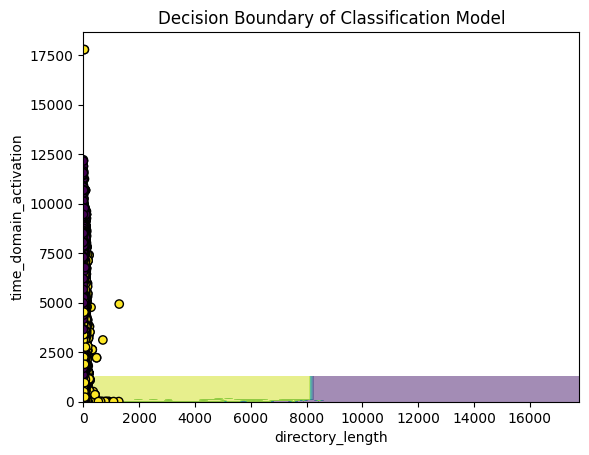

In [ ]:
decision_boundary(model, best_params, X_train, y_train)

## Learning Curve

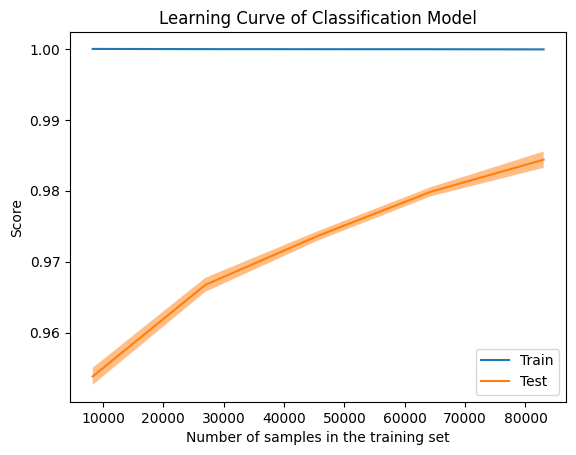

In [ ]:
learning_curv(clf, X_train, y_train)

## Ice Curve (top 3 features)

In [ ]:
w!

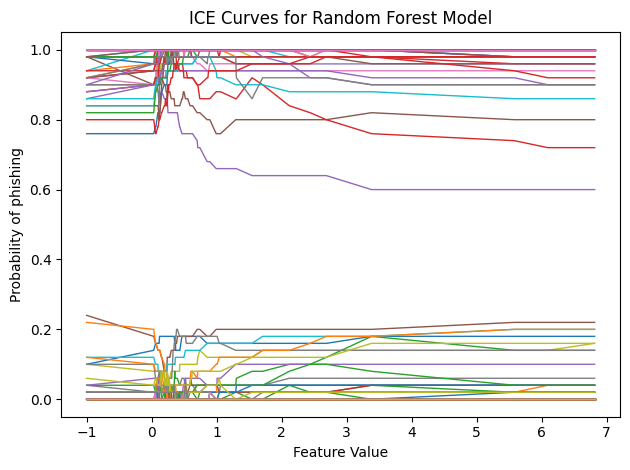

In [ ]:
ice_curve("directory_length", X_train, model)

In [ ]:
ice_curve("time_response", X_train, model)

In [ ]:
ice_curve("time_response", X_train, model)